<a href="https://colab.research.google.com/github/analluvias/ensemble-methods/blob/master/predicting_movie_rental_durations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projeto-mineracao-dados/rental_info.csv')

"rental_date": The date (and time) the customer rents the DVD.

"return_date": The date (and time) the customer returns the DVD.

"amount": The amount paid by the customer for renting the DVD.

"amount_2": The square of "amount".

"rental_rate": The rate at which the DVD is rented for.

"rental_rate_2": The square of "rental_rate".
"release_year": The year the movie being rented was released.

"length": Lenght of the movie being rented, in minuites.

"length_2": The square of "length".

"replacement_cost": The amount it will cost the company to replace the DVD.

"special_features": Any special features, for example trailers/deleted scenes that the DVD also has.

"NC-17", "PG", "PG-13", "R": These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

G — General Audiences

Livre para todos os públicos.
Conteúdo totalmente apropriado para crianças.


PG — Parental Guidance Suggested

“Recomendado acompanhamento dos pais”.

Pode conter alguma linguagem leve, humor adulto ou cenas que não são totalmente infantis.

Crianças podem assistir, mas recomenda-se supervisão.

PG-13 — Parents Strongly Cautioned

“Pais fortemente cautelados”.

Não recomendado para menores de 13 anos.

Pode ter violência moderada, temas mais adultos, linguagem mais forte e insinuações sexuais leves.

R — Restricted

“Restrito”.

Menores de 17 anos só podem assistir acompanhados dos pais/responsáveis.

Conteúdo pode incluir violência forte, nudez, sexo explícito leve, linguagem pesada ou temas sensíveis.

NC-17 — Adults Only

“Não recomendado para menores de 17 anos”.

Entrada proibida para menores, mesmo acompanhados.

Pode conter sexo explícito, violência extrema, nudez intensa ou conteúdo altamente adulto.

Hollywood costuma evitar essa classificação, pois prejudica bilheteria.

In [ ]:
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [ ]:
df['rental_date'].describe()

,rental_date
count,15861
unique,15813
top,2005-07-29 04:14:37+00:00
freq,2


In [ ]:
df['return_date'].describe()

,return_date
count,15861
unique,15836
top,2005-06-22 01:54:15+00:00
freq,2


In [ ]:
df['amount'].describe()

,amount
count,15861.000000
mean,4.217161
std,2.360383
min,0.990000
25%,2.990000
50%,3.990000
75%,4.990000
max,11.990000


In [ ]:
df['release_year'].describe()

,release_year
count,15861.000000
mean,2006.885379
std,2.025027
min,2004.000000
25%,2005.000000
50%,2007.000000
75%,2009.000000
max,2010.000000


In [ ]:
df['rental_rate'].describe()

,rental_rate
count,15861.000000
mean,2.944101
std,1.649766
min,0.990000
25%,0.990000
50%,2.990000
75%,4.990000
max,4.990000


In [ ]:
df['length'].describe()

,length
count,15861.000000
mean,114.994578
std,40.114715
min,46.000000
25%,81.000000
50%,114.000000
75%,148.000000
max,185.000000


In [ ]:
df['replacement_cost'].describe()

,replacement_cost
count,15861.000000
mean,20.224727
std,6.083784
min,9.990000
25%,14.990000
50%,20.990000
75%,25.990000
max,29.990000


In [ ]:
df['special_features'].value_counts(dropna=False)

,count
special_features,
"{Trailers,Commentaries,""Behind the Scenes""}",1308
{Trailers},1139
"{Trailers,Commentaries}",1129
"{Trailers,""Behind the Scenes""}",1122
"{""Behind the Scenes""}",1108
"{Commentaries,""Deleted Scenes"",""Behind the Scenes""}",1101
{Commentaries},1089
"{Commentaries,""Behind the Scenes""}",1078
"{Trailers,""Deleted Scenes""}",1047


In [ ]:
df['special_features_clean'] = (
    df['special_features']
        .str.replace(r'[\{\}]', '', regex=True)  # remove { }
        .str.replace('"', '')                    # remove aspas
        .str.split(',')                          # separa em lista
)

In [ ]:
features = ["Trailers", "Commentaries", "Deleted Scenes", "Behind the Scenes"]

for f in features:
    df[f] = df['special_features_clean'].apply(lambda lst: int(f in lst))


In [ ]:
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,special_features_clean,Trailers,Commentaries,Deleted Scenes,Behind the Scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1


In [ ]:
df['NC-17'].value_counts(dropna=False)

,count
NC-17,
0,12612
1,3249


In [ ]:
df['PG'].value_counts(dropna=False)

,count
PG,
0,12684
1,3177


In [ ]:
df['PG-13'].value_counts(dropna=False)

,count
PG-13,
0,12318
1,3543


In [ ]:
df['R'].value_counts(dropna=False)

,count
R,
0,12709
1,3152


converter as colunas que armazenam data para datetime

In [ ]:
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   rental_date             15861 non-null  datetime64[ns, UTC]
 1   return_date             15861 non-null  datetime64[ns, UTC]
 2   amount                  15861 non-null  float64            
 3   release_year            15861 non-null  float64            
 4   rental_rate             15861 non-null  float64            
 5   length                  15861 non-null  float64            
 6   replacement_cost        15861 non-null  float64            
 7   special_features        15861 non-null  object             
 8   NC-17                   15861 non-null  int64              
 9   PG                      15861 non-null  int64              
 10  PG-13                   15861 non-null  int64              
 11  R                       15861 non-null  i

agora vamos fazer uma aritmética para obter a quantidade de dias que a pessoa passou com aquele filme

In [ ]:
df['rental_days'] = (df['return_date'] - df['rental_date']).dt.days

In [ ]:
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,...,R,amount_2,length_2,rental_rate_2,special_features_clean,Trailers,Commentaries,Deleted Scenes,Behind the Scenes,rental_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,...,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,...,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,...,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,...,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,...,1,8.9401,15876.0,8.9401,"[Trailers, Behind the Scenes]",1,0,0,1,4


In [ ]:
df.drop(columns=['rental_date', 'return_date', 'special_features_clean', 'special_features'], inplace = True)
df.head()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,Trailers,Commentaries,Deleted Scenes,Behind the Scenes,rental_days
0,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,3
1,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,2
2,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,7
3,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,2
4,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,4


In [ ]:
# transformar release_year em uma variável estacionária age

df['age'] = 2025 - df['release_year']
df.drop(columns=['release_year'], inplace = True)
df.head()

,amount,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,Trailers,Commentaries,Deleted Scenes,Behind the Scenes,rental_days,age
0,2.99,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,3,20.0
1,2.99,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,2,20.0
2,2.99,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,7,20.0
3,2.99,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,2,20.0
4,2.99,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,0,0,1,4,20.0


In [ ]:
# from pandas.plotting import scatter_matrix
# import matplotlib.pyplot as plt

# scatter_matrix(df, figsize=(20, 20))
# plt.show()


<Axes: xlabel='amount', ylabel='rental_days'>

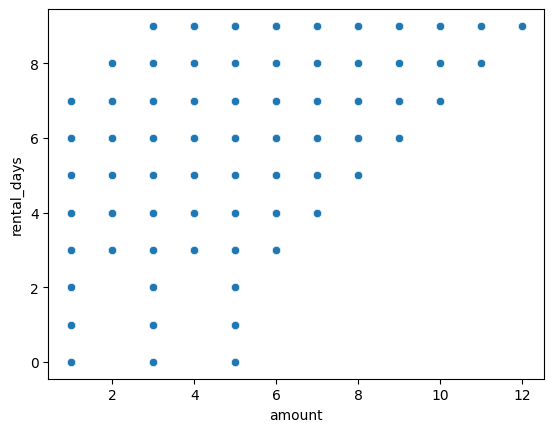

In [ ]:
# vamos visualizar o scatterplot das variáveis amount, length e rental_rate
# com a variável resposta

import seaborn as sns
sns.scatterplot(x=df['amount'], y=df['rental_days'])

<Axes: xlabel='length', ylabel='rental_days'>

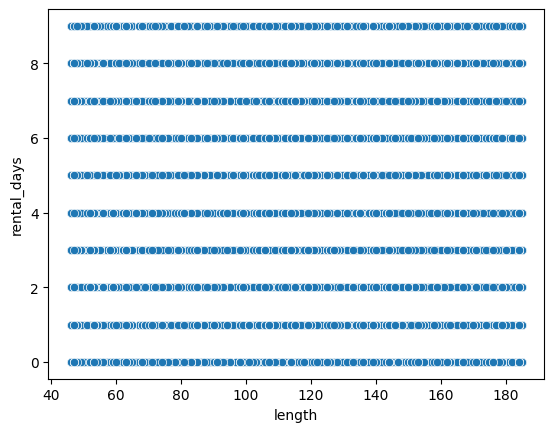

In [ ]:
sns.scatterplot(x=df['length'], y=df['rental_days'])

<Axes: xlabel='length_2', ylabel='rental_days'>

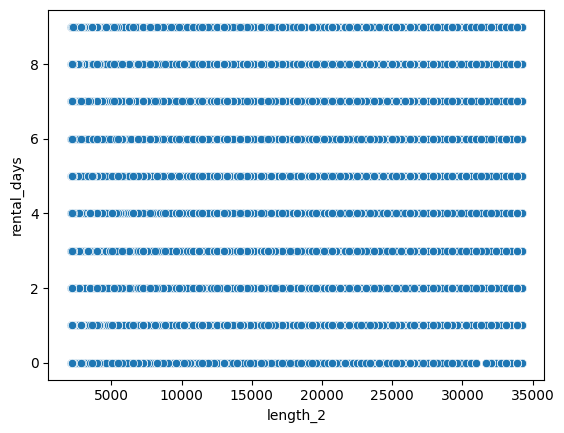

In [ ]:
sns.scatterplot(x=df['length_2'], y=df['rental_days'])

<Axes: xlabel='rental_rate', ylabel='rental_days'>

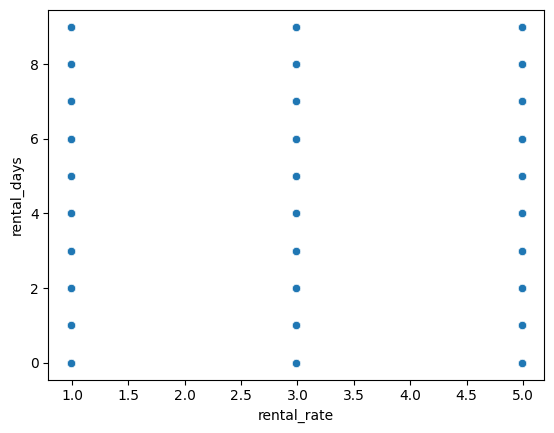

In [ ]:
sns.scatterplot(x=df['rental_rate'], y=df['rental_days'])

vamos testar reglinear, lasso e ridge

In [ ]:
# primeiro vamos escalar as colunas numéricas

from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

colunas_numericas = ['amount', 'rental_rate', 'length', 'replacement_cost', 'amount_2', 'length_2', 'rental_rate_2', 'age']

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_numericas)
    ],
    remainder='passthrough'
)


In [ ]:
# criar o pipeline e os modelos de teste

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])

model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

In [ ]:
# pipeline de um gradientboosting regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("gbr", GradientBoostingRegressor())
])

In [ ]:
# adicinando randomized search
from sklearn.model_selection import RandomizedSearchCV


param_grids = {

    "LinearRegression": {
      'lr__fit_intercept': [True, False],
    },

    "Lasso": {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10],
        'lasso__fit_intercept': [True, False],
        'lasso__max_iter': [1000, 3000, 5000]
    },
    "Ridge": {
        'ridge__alpha': [0.001, 0.01, 0.1, 1, 10],
        'ridge__fit_intercept': [True, False],
    },
    "GradientBoostingRegressor": {
      "gbr__n_estimators": [200, 300, 400],
      "gbr__learning_rate": [0.01, 0.05, 0.1],
      "gbr__max_depth": [2, 3, 4],
      "gbr__subsample": [0.8, 1.0],
      "gbr__min_samples_split": [2, 5, 10]
    }

}

In [ ]:
random_search_lr = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=param_grids["LinearRegression"],
    n_iter=4,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

In [ ]:
random_search_lasso = RandomizedSearchCV(
    estimator=model_lasso,
    param_distributions=param_grids["Lasso"],
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

In [ ]:
random_search_ridge = RandomizedSearchCV(
    estimator=model_ridge,
    param_distributions=param_grids["Ridge"],
    n_iter = 10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

In [ ]:
random_search_gbr = RandomizedSearchCV(
    estimator=gbr_pipeline,
    param_distributions=param_grids["GradientBoostingRegressor"],
    n_iter = 10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)


In [ ]:
# separando os dados em treino e teste

from sklearn.model_selection import train_test_split

X = df.drop('rental_days', axis=1)
y = df['rental_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [ ]:
# visualizando o melhor score de cada um dos random searchs

random_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['amount',
                                                                                'rental_rate',
                                                                                'length',
                                                                                'replacement_cost',
                                                                                'amount_2',
                                                                                'length_2',
                                                                                'rental_rate_2',
                                                                                'age'])])),
                                             ('lr', LinearRegression())]),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'lr__fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(random_search_lr.best_score_)
print(random_search_lr.best_params_)

-2.863706554629547
{'lr__fit_intercept': True}


In [ ]:
random_search_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['amount',
                                                                                'rental_rate',
                                                                                'length',
                                                                                'replacement_cost',
                                                                                'amount_2',
                                                                                'length_2',
                                                                                'rental_rate_2',
                                                                                'age'])])),
                                             ('lasso', Lasso())]),
                   n_jobs=-1,
                   param_distributions={'lasso__alpha': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'lasso__fit_intercept': [True, False],
                                        'lasso__max_iter': [1000, 3000, 5000]},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(random_search_lasso.best_score_)
print(random_search_lasso.best_params_)

-2.8635218438119456
{'lasso__max_iter': 1000, 'lasso__fit_intercept': True, 'lasso__alpha': 0.001}


In [ ]:
random_search_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['amount',
                                                                                'rental_rate',
                                                                                'length',
                                                                                'replacement_cost',
                                                                                'amount_2',
                                                                                'length_2',
                                                                                'rental_rate_2',
                                                                                'age'])])),
                                             ('ridge', Ridge())]),
                   n_jobs=-1,
                   param_distributions={'ridge__alpha': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'ridge__fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(random_search_ridge.best_score_)
print(random_search_ridge.best_params_)

-2.863699370750436
{'ridge__fit_intercept': True, 'ridge__alpha': 1}


testando um gradient boosting regressor (modelo de várias árvores fracas)

In [ ]:
random_search_gbr.fit(X_train, y_train)
print(random_search_gbr.best_score_)
print(random_search_gbr.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
-2.1417471872914033
{'gbr__subsample': 1.0, 'gbr__n_estimators': 400, 'gbr__min_samples_split': 10, 'gbr__max_depth': 4, 'gbr__learning_rate': 0.05}


vamos testar também um stacking regressor a partir dos nossos modelos

In [ ]:
# primeira camada
regressors = [
    ('lasso', Lasso(max_iter= 5000, fit_intercept= True, alpha=0.001)),
    ('ridge', Ridge(fit_intercept= True, alpha= 1))
]

In [ ]:
# segunda camada
from sklearn.ensemble import StackingRegressor

reg_meta = LinearRegression()

In [ ]:
# Stacking classifier
reg_stack = StackingRegressor(
    estimators=regressors,
    final_estimator=reg_meta,
    cv=5,
    passthrough=False
    )

In [ ]:
# Use the fit and predict methods
reg_stack.fit(X_train, y_train)
pred = reg_stack.predict(X_test)


In [ ]:
# vamos calcular o rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [ ]:
print(rmse)

1.696164972986804


Nesse caso, podemos ver que os modelos stacking se sairam melhor, tanto o gradient boosting regressor, quanto, principalmente o stacking regressor, feito a partir dos outros modelos que treinamos anteriormente (lasso e ridge, e usando uma lr como segunda camada)